<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracción y visualización de datos bursátiles</h1>
<h2>Descripción</h2>


Extraer datos esenciales de un conjunto de datos y mostrarlos es una parte necesaria de la ciencia de datos; por lo tanto, las personas pueden tomar decisiones correctas en función de los datos. En esta tarea, extraerá algunos datos bursátiles y luego los mostrará en un gráfico.



<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [ ]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [95]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

En Python, puedes ignorar las advertencias mediante el módulo Warnings. Puedes usar la función filterwarnings para filtrar o ignorar mensajes o categorías de advertencias específicas.


In [98]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Definir función gráfica

En esta sección, definimos la función `make_graph`. **No es necesario que sepa cómo funciona la función, solo debe interesarle la información de entrada. Toma un marco de datos con datos de acciones (el marco de datos debe contener columnas de fecha y cierre), un marco de datos con datos de ingresos (el marco de datos debe contener columnas de fecha e ingresos) y el nombre de la acción.**



In [102]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Utilice la función make_graph que ya hemos definido. Deberá invocarla en las preguntas 5 y 6 para mostrar los gráficos y crear el panel.
> **Nota: No es necesario que redefina la función para trazar gráficos en ningún otro lugar de este cuaderno; simplemente utilice la función existente.**

## Pregunta 1: Utilice yfinance para extraer datos bursátiles


Con la función `Ticker`, introduzca el símbolo de cotización de la acción de la que deseamos extraer datos para crear un objeto de cotización. La acción es Tesla y su símbolo de cotización es `TSLA`.


In [107]:
Tesla= yf.Ticker("TSLA")
Tesla

yfinance.Ticker object <TSLA>

Utilizando el objeto ticker y la función `history` se extrae información bursátil y se guarda en un marco de datos llamado `tesla_data`. Establezca el parámetro `period` en `"max"` para que obtengamos información durante la máxima cantidad de tiempo.


In [110]:
tesla_data = Tesla.history(period="max")


**Restablezca el índice** utilizando la función `reset_index(inplace=True)` en el marco de datos tesla_data y muestre las primeras cinco filas del marco de datos `tesla_data` utilizando la función `head`. Tome una captura de pantalla de los resultados y el código desde el comienzo de la pregunta 1 hasta los resultados a continuación.

In [113]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data

## Pregunta 2: Utilice el raspado web para extraer datos de ingresos de Tesla


Utilice la biblioteca `requests` para descargar la página web https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Guarde el texto de la respuesta como una variable llamada `html_data`.


In [178]:
import requests

url = ' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
response = requests.get(url)


with open('html_data', 'wb') as file:
    file.write(response.content)

print("Archivo descargado correctamente.")

Archivo descargado correctamente.


In [179]:
html_data  = requests.get(url).text

Analice los datos html usando `beautiful_soup` usando el analizador, es decir, `html5lib` o `html.parser`.



In [181]:
soup = BeautifulSoup(html_data,"html.parser")

Con "BeautifulSoup" o la función "read_html", extraiga la tabla con "Tesla Revenue" y almacénela en un marco de datos llamado "tesla_revenue". El marco de datos debe tener las columnas "Date" e "Revenue".

In [195]:
import pandas as pd

# Extraer todas las tablas de la página usando read_html
tables = pd.read_html(html_data)

# Seleccionar la tabla en el índice 1 (la de Tesla Revenue)
tesla_revenue = tables[1]

# Renombrar las columnas a "Date" y "Revenue" si es necesario
tesla_revenue.columns = ["Date", "Revenue"]


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


Ejecute la siguiente línea para eliminar la coma y el signo de dólar de la columna "Ingresos". 


In [200]:
# Quitar el símbolo de dólar y las comas en la columna Revenue y convertirla a float
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace('[\$,]', '', regex=True).astype(float)


In [202]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]


Muestra las últimas 5 filas del marco de datos `tesla_revenue` utilizando la función `tail`. Toma una captura de pantalla de los resultados.



In [205]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31.0
49,2010-06-30,28.0
50,2010-03-31,21.0
52,2009-09-30,46.0
53,2009-06-30,27.0


## Pregunta 3: Utilice yfinance para extraer datos bursátiles


Con la función `Ticker`, introduzca el símbolo de cotización de la acción de la que deseamos extraer datos para crear un objeto de cotización. La acción es GameStop y su símbolo de cotización es `GME`.



In [207]:
GameStop = yf.Ticker("GME")
GameStop

yfinance.Ticker object <GME>

Utilizando el objeto ticker y la función `history` se extrae información bursátil y se guarda en un marco de datos llamado `gme_data`. Establezca el parámetro `period` en `"max"` para que obtengamos información durante la máxima cantidad de tiempo.


In [210]:
gme_data= GameStop.history(period="max")


**Restablezca el índice** utilizando la función `reset_index(inplace=True)` en el marco de datos gme_data y muestre las primeras cinco filas del marco de datos `gme_data` utilizando la función `head`. Tome una captura de pantalla de los resultados y el código desde el comienzo de la pregunta 3 hasta los resultados a continuación.


In [213]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [215]:
import requests

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
response = requests.get(url)


with open('html_data_2', 'wb') as file:
    file.write(response.content)

print("Archivo descargado correctamente.")

Archivo descargado correctamente.


In [216]:
html_data_2  = requests.get(url).text

Analice los datos html usando `beautiful_soup` usando el analizador, es decir, `html5lib` o `html.parser`.



In [218]:
soup = BeautifulSoup(html_data,"html.parser")

Con `BeautifulSoup` o la función `read_html` extraiga la tabla con `GameStop Revenue` y almacénela en un marco de datos llamado `gme_revenue`. El marco de datos debe tener las columnas `Date` y `Revenue`. Asegúrese de que la coma y el signo de dólar se eliminen de la columna `Revenue`.


> **Nota: Utilice un método similar al que utilizó en la pregunta 2.**


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [223]:
import pandas as pd

# Extraer todas las tablas de la página usando read_html
tables = pd.read_html(html_data_2)

# Seleccionar la tabla en el índice 1 (la de Tesla Revenue)
gme_revenue = tables[1]

# Renombrar las columnas a "Date" y "Revenue" si es necesario
gme_revenue.columns = ["Date", "Revenue"]


In [227]:
# Eliminar comas y el signo de dólar, luego convertir a float
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"", regex=True).astype(float)


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [230]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667.0
58,2005-10-31,534.0
59,2005-07-31,416.0
60,2005-04-30,475.0
61,2005-01-31,709.0


## Pregunta 5: Dibuje un gráfico de las acciones de Tesla


Utilice la función `make_graph` para representar gráficamente los datos de las acciones de Tesla. Además, proporcione un título para el gráfico. Tenga en cuenta que el gráfico solo mostrará datos hasta junio de 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


C:\Users\danny\AppData\Local\Temp\ipykernel_23140\2068038883.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\danny\AppData\Local\Temp\ipykernel_23140\2068038883.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



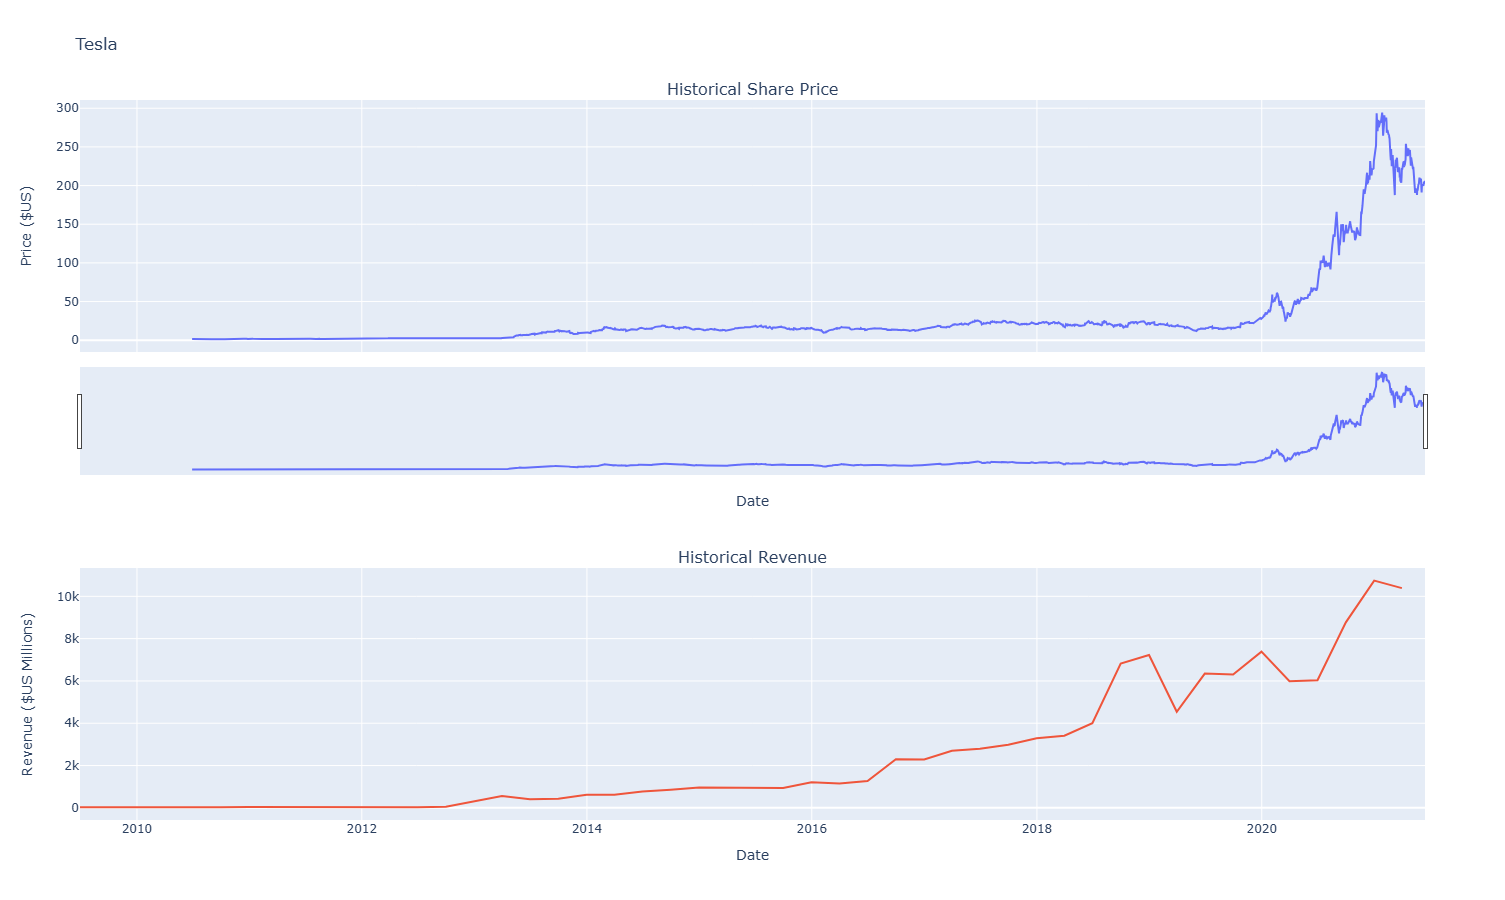

In [166]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

## Pregunta 6: Dibuje un gráfico de las acciones de GameStop

Utilice la función `make_graph` para representar gráficamente los datos bursátiles de GameStop y proporcione también un título para el gráfico. La estructura para llamar a la función `make_graph` es `make_graph(gme_data, gme_revenue, 'GameStop')`. Tenga en cuenta que el gráfico solo mostrará datos hasta junio de 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


C:\Users\danny\AppData\Local\Temp\ipykernel_23140\2068038883.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\danny\AppData\Local\Temp\ipykernel_23140\2068038883.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



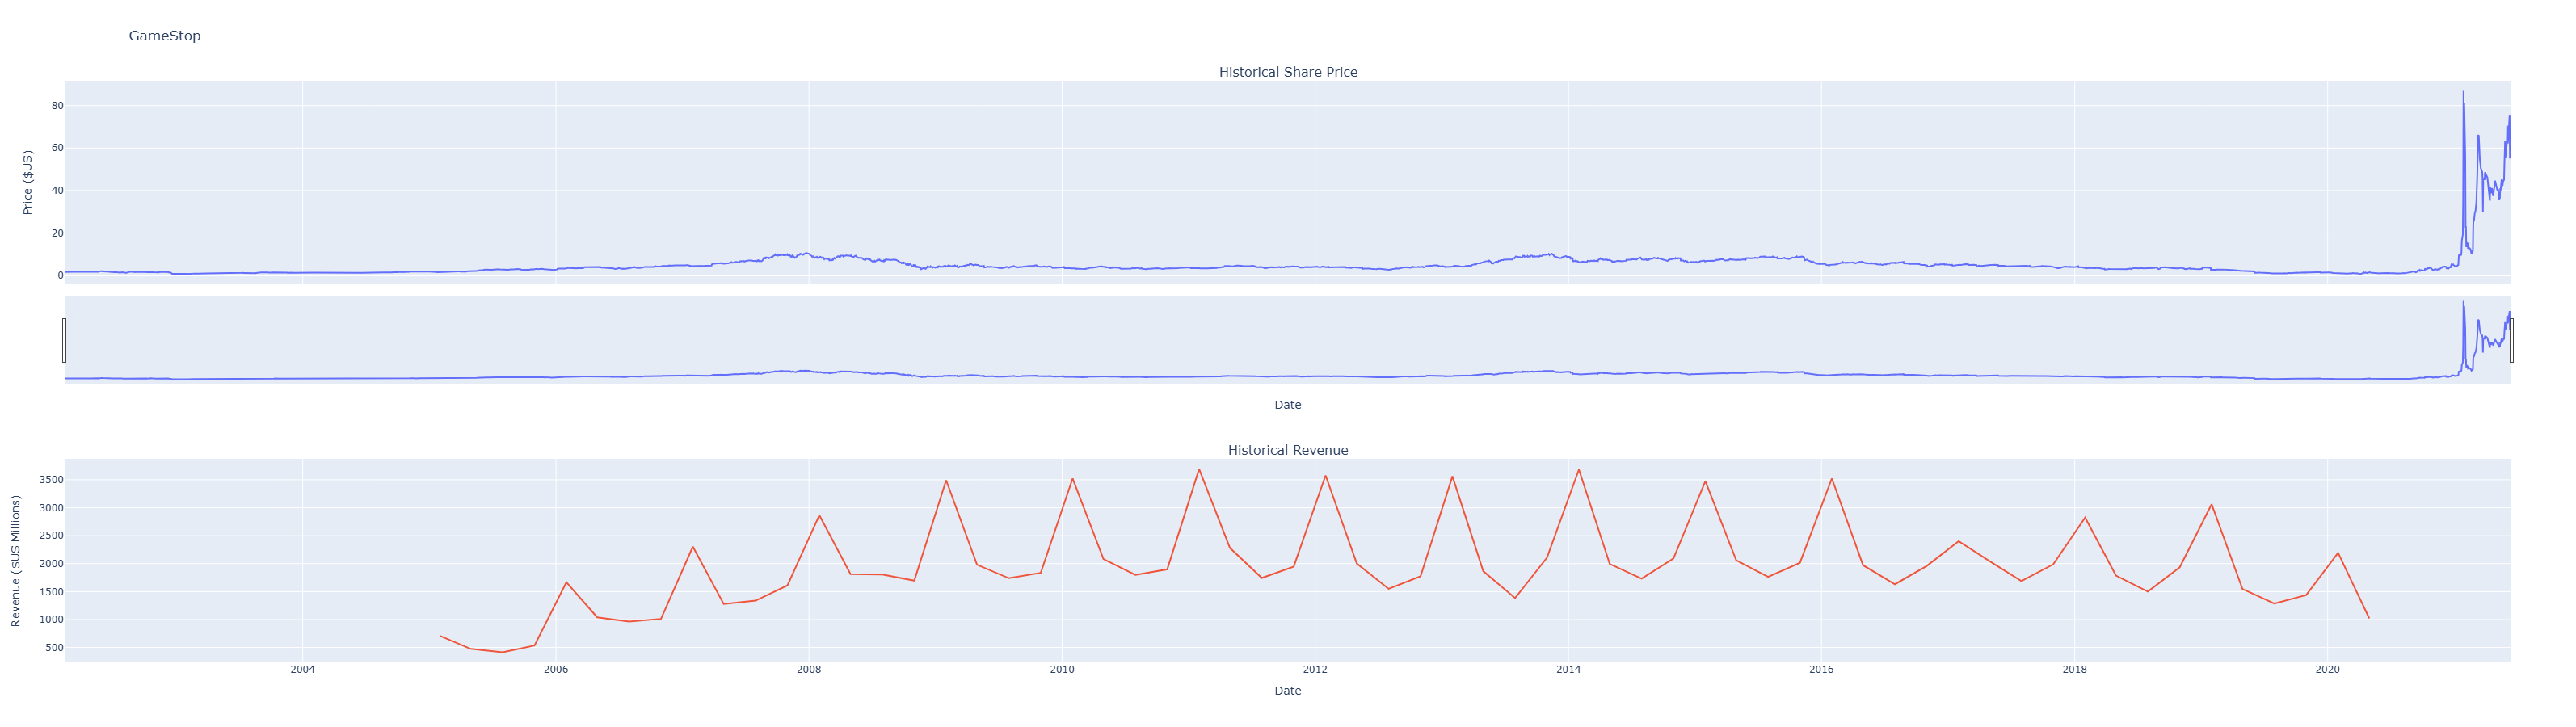

In [234]:
make_graph(gme_data, gme_revenue, 'GameStop')

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
